In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math

# LOGISTIC REGRESSION WITH TWO FEATURES

In [2]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
m,n = x_train.shape

In [3]:
def sigmoid(z):
    g = 1/(1+math.exp(-1*z))
    return g

In [4]:
def log_reg_cost(x,y,w,b,lamda):
    cost = 0.0
    reg_cost = 0.0
    for i in range(m):
        z = np.dot(x[i],w)+b
        sig = sigmoid(z)
        cost += (-y[i]*np.log(sig))-(1-y[i])*np.log(1-sig)
    cost = cost/m
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = lamda*(reg_cost)/(2*m)
    cost+=reg_cost
    return cost

In [5]:
def log_comp_gradient_descent(x,y,w,b,lamda):
    dj_dw = np.zeros(n,)
    dj_db = 0.0
    for i in range(m):
        z = np.dot(x[i],w)+b
        sig = sigmoid(z)
        for j in range(n):
            dj_dw[j] += ((sig-y[i])*x[i][j])+((lamda*w[j])/m)
        dj_db += (sig-y[i])
    dj_dw = (dj_dw/m)
    dj_db = dj_db/m
    return dj_dw,dj_db
# X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y_tmp = np.array([0, 0, 0, 1, 1, 1])
# w_tmp = np.array([2.,3.])
# b_tmp = 1.
# dj_dw,dj_db=log_comp_gradient_descent(X_tmp, y_tmp, w_tmp, b_tmp)
# print(dj_dw,dj_db)

In [6]:
def log_gradient_descent(x,y,w,b,l_rate,alpha,lamda):
    J = 0.0 #cost
    wl = []
    bl = []
    Jl = []
    for i in range(l_rate):
        dj_dw,dj_db = log_comp_gradient_descent(x,y,w,b,lamda)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = log_reg_cost(x,y,w,b,lamda)
        if i<100000:      # prevent resource exhaustion 
            Jl.append( log_reg_cost(x,y,w,b,lamda) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(l_rate / 10) == 0:
            print(f"Iteration {i:4d}: Cost {Jl[-1]}   ")
        wl.append(w)
        bl.append(b)
#         Jl.append(J)
    return w,b,J,wl,bl,Jl

Iteration    0: Cost 0.6563440972101644   
Iteration 1000: Cost 0.47760667307448335   
Iteration 2000: Cost 0.47760667307448346   
Iteration 3000: Cost 0.47760667307448346   
Iteration 4000: Cost 0.47760667307448346   
Iteration 5000: Cost 0.47760667307448346   
Iteration 6000: Cost 0.47760667307448346   
Iteration 7000: Cost 0.47760667307448346   
Iteration 8000: Cost 0.47760667307448346   
Iteration 9000: Cost 0.47760667307448346   
0.47760667307448346 [1.12471395 0.94136684] -2.9355462094858567
0.47760667307448346


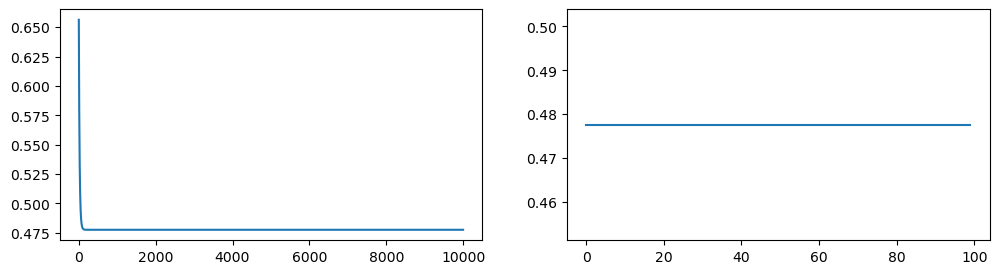

In [7]:
w_in = np.zeros(n,)
b_in = 0.0
alpha = 0.7
l_rate = 10000
lamda =0.7
w,b,J,wl,bl,Jl = log_gradient_descent(x_train,y_train,w_in,b_in,l_rate,alpha,lamda)
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(Jl)
ax[1].plot(Jl[9900:])
print(J,w,b)
minm = 5.0

print(Jl[-1])

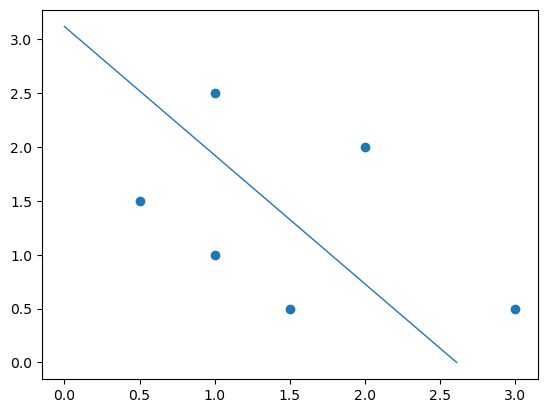

In [8]:
x0 = -b/w[0]
x1 = -b/w[1]
plt.plot([0,x0],[x1,0], lw=1)
plt.scatter(x_train[:,0],x_train[:,1])

In [9]:
x=np.zeros(n,)
for i in range(n):
    x[i]=float(input())
z = np.dot(x,w)+b
sig = sigmoid(z)
if sig>=0.5:
    print(1,"- yes")
else:
    print(0,"- no")


3
3
1 - yes


# LOGISTIC REGRESSION WITH ONE FEATURE

In [10]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

In [11]:
def log_reg_cost(x,y,w,b):
    cost = 0.0
    for i in range(m):
        z = x[i]*w+b
        sig = sigmoid(z)
        cost += (-y[i]*np.log(sig))-(1-y[i])*np.log(1-sig)
    cost = cost/m
    return cost

In [12]:
def log_comp_gradient_descent(x,y,w,b):
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        z = x[i]*w+b
        sig = sigmoid(z)
        dj_dw += (sig-y[i])*x[i]
        dj_db += (sig-y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [13]:
def log_gradient_descent(x,y,w,b,l_rate,alpha):
    J = 0.0 #cost
    wl = []
    bl = []
    Jl = []
    for i in range(l_rate):
        dj_dw,dj_db = log_comp_gradient_descent(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = log_reg_cost(x,y,w,b)
        if i<100000:      # prevent resource exhaustion 
            Jl.append( log_reg_cost(x,y,w,b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(l_rate / 10) == 0:
            print(f"Iteration {i:4d}: Cost {Jl[-1]}   ")
        wl.append(w)
        bl.append(b)
#         Jl.append(J)
    return w,b,J,wl,bl,Jl

Iteration    0: Cost 0.5803688287425598   
Iteration 1000: Cost 0.061050333895071286   
Iteration 2000: Cost 0.037964695342507924   
Iteration 3000: Cost 0.027665283966126747   
Iteration 4000: Cost 0.021746568222994703   
Iteration 5000: Cost 0.017897161751533212   
Iteration 6000: Cost 0.015194257431623892   
Iteration 7000: Cost 0.013193353370052183   
Iteration 8000: Cost 0.011653350112300224   
Iteration 9000: Cost 0.010432076461838644   
0.009441176612955847 7.132521072399263 -17.65187774895262
0.009441176612955847


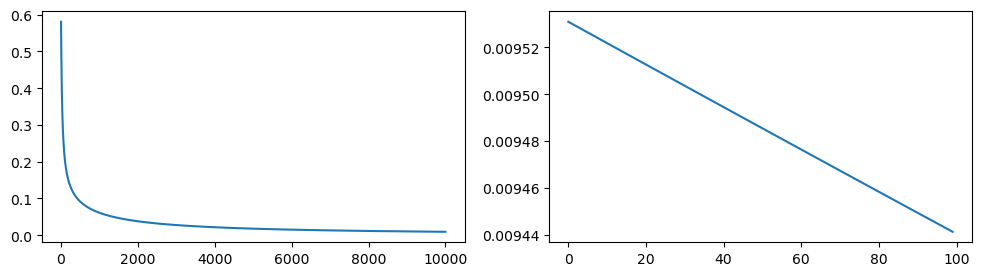

In [14]:
w_in = 0.0
b_in = 0.0
alpha = 0.3
l_rate = 10000
w,b,J,wl,bl,Jl = log_gradient_descent(x_train,y_train,w_in,b_in,l_rate,alpha)
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(Jl)
ax[1].plot(Jl[9900:])
print(J,w,b)
minm = 5.0

print(Jl[-1])

[2.1571825029073933e-08, 2.7007831330200786e-05, 0.032709427363377314, 0.9769255717880333, 0.9999811354376786, 0.9999999849325285]


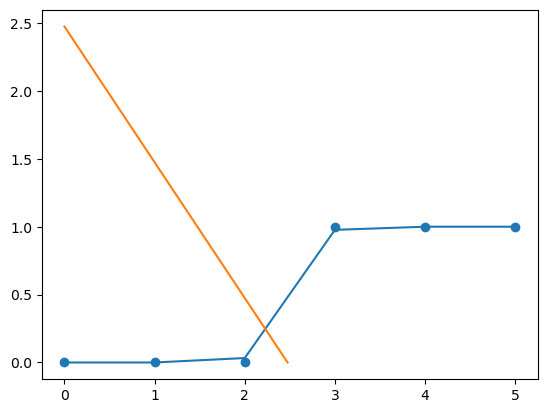

In [15]:
y=[]
for i in range(len(x_train)):
    z = x_train[i]*w+b
    sig = sigmoid(z)
    y.append(sig)
plt.plot(x_train,y)
plt.scatter(x_train,y_train)
x0 = -b/w
plt.plot((0,x0),(x0,0))
print(y)

In [16]:
x_p = float(input())
z = x_p*w+b
sig = sigmoid(z)
print(sig)
if sig >=0.5:
    print(sig,": yes")
else:
    print(sig,": no")

2
0.032709427363377314
0.032709427363377314 : no


# i have done logistic regression and it is regularised inorder to handle overfit